In [2]:
from ode_functions import plot_time_series_one_var,make_parameters,fun, plot_time_series, plot_projections, ic_function, convert_to_dict_2,theta_from_param, classify_orbit
from periodic_orbits import stg_coordinate, get_periodic_domains
from classify_orbits import IC_location
import scipy.integrate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [10]:
# Import parameters
label = 'M1F'
num_parameters_sampled = 100
params = make_parameters(label,num_parameters_sampled)

In [11]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 50

In [15]:
#parameter index for large orbit and small orbit
large_index = 91
small_index = 3
print('large: ',params[large_index],'\n')
print('small: ',params[small_index])

large:  {'LMcP': 1.8332491217695588, 'LMcT': 1.0, 'LPMn': 0.5, 'LPT': 0.7622579014914057, 'thetaMcMc': 1.1307557770318044, 'thetaMcP': 1.5011155699455225, 'thetaMnMc': 0.9946197821059586, 'thetaPMn': 1.0294602115528193, 'thetaPT': 1.605803349053471, 'UMcP': 2.6973331454147904, 'UMcT': 1.9511904761904761, 'UPMn': 2.0, 'UPT': 0.9196686262899795} 

small:  {'LMcP': 1.8332491217695588, 'LMcT': 1.0, 'LPMn': 0.5, 'LPT': 0.7622579014914057, 'thetaMcMc': 1.1477700525473602, 'thetaMcP': 1.3173247744953454, 'thetaMnMc': 0.96602260578252, 'thetaPMn': 1.0486090087728224, 'thetaPT': 1.9741870565113881, 'UMcP': 2.6973331454147904, 'UMcT': 1.9511904761904761, 'UPMn': 2.0, 'UPT': 0.9196686262899795}


## Large Solutions

0
1
2
3
4
5
6
7
8
9


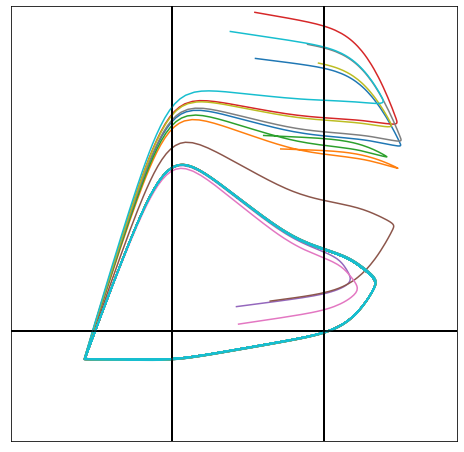

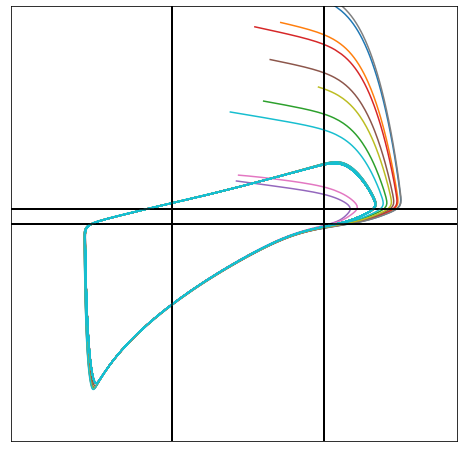

In [18]:
#plot large solutions in phase space
fig1,ax1 = plt.subplots(1,1,figsize = (8,8))
fig2,ax2 = plt.subplots(1,1,figsize = (8,8))
ax1.set_xlim(0.85,1.25)
ax1.set_ylim(.7,2)
ax2.set_xlim(0.85,1.25)
ax2.set_ylim(0,3)
#set initial conditions
p = params[large_index]
IC_domain = IC_location(label)
ICs = ic_function(IC_domain,p,10)
#p['LPMn'] = .9
#p['thetaMcP'] = .81
for i in range(ICs.shape[0]):
    cur_IC = ICs[i,:]
    print(str(i),flush = True)
    large_sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,p,n,decays),[0,tf],y0 = cur_IC,method = 'BDF',rtol = 1e-5,atol = 1e-8)
    plot_projections(large_sol,p,axs = (ax1,ax2),make_ticks = False,label = False)

In [19]:
print(large_sol.y[:,-1])
print(stg_coordinate(large_sol.y[:,-1],theta_from_param(params[large_index])))
print(fun(0,large_sol.y[:,-1],params[large_index],n,decays))
# domains = get_periodic_domains(large_sol.y,theta_from_param(p))
# print(classify_orbit(domains))
# print(p['LPMn'])

[0.9219874  0.99605866 0.52123549]
[0 0 0]
[-0.008406914889777184, -0.07544044524839433, 0.4830280624466799]


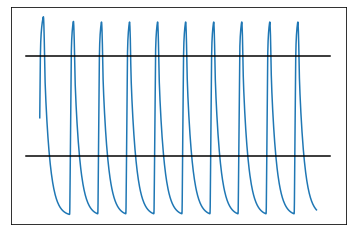

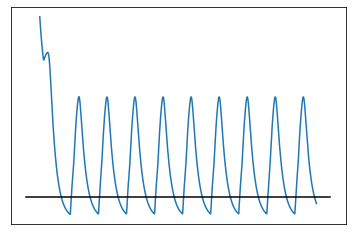

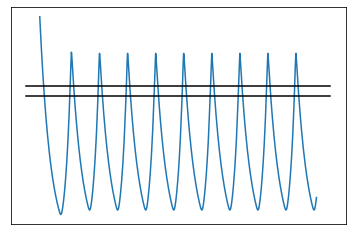

In [21]:
#plot large solutions in time series
fig1,ax1 = plt.subplots(1,1,figsize = (6,4))
fig2,ax2 = plt.subplots(1,1,figsize = (6,4))
fig3,ax3 = plt.subplots(1,1,figsize = (6,4))
plot_time_series(large_sol,params[large_index],axs = (ax1,ax2,ax3),make_ticks = False,label = False)

# Small Solutions

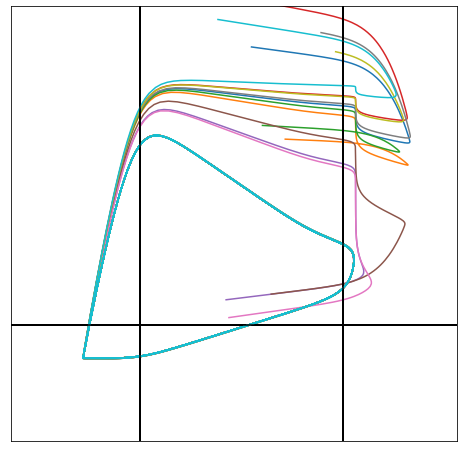

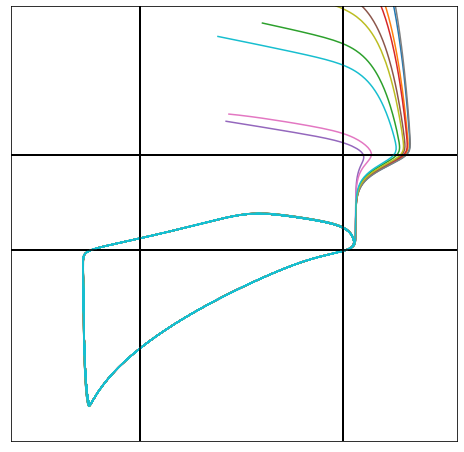

In [24]:
#plot small solutions in phase space
fig1,ax1 = plt.subplots(1,1,figsize = (8,8))
fig2,ax2 = plt.subplots(1,1,figsize = (8,8))
ax1.set_xlim(.85,1.25)
ax1.set_ylim(.7,2)
ax2.set_xlim(0.85,1.25)
ax2.set_ylim(0,3)
p = params[small_index]
IC_domain = IC_location(label)
ICs = ic_function(IC_domain,p,10)
for i in range(ICs.shape[0]):
    cur_IC = ICs[i,:]
    small_sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,params[small_index],n,decays),[0,tf],y0 = cur_IC,method = 'BDF',rtol = 1e-5,atol = 1e-8)
    plot_projections(small_sol,params[small_index],axs = (ax1,ax2),make_ticks = False,label = False)


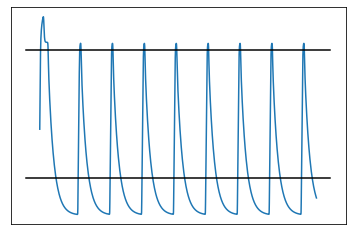

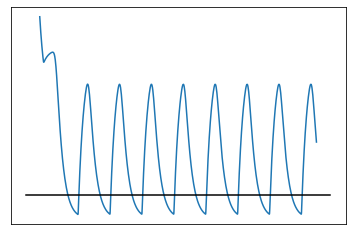

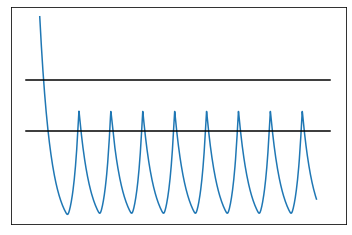

In [25]:
#plot small solutions in time series
fig1,ax1 = plt.subplots(1,1,figsize = (6,4))
fig2,ax2 = plt.subplots(1,1,figsize = (6,4))
fig3,ax3 = plt.subplots(1,1,figsize = (6,4))
plot_time_series(small_sol,params[small_index],axs = (ax1,ax2,ax3),make_ticks = False,label = False)